In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
from importlib import reload


import config, data, models, train, evaluate

In [2]:
exp_root = Path("/nas/cee-water/cjgleason/ted/swot-ml/runs/Ohio/masked_assimilation")
exp_dirs = [p.parent for p in exp_root.rglob('test_data.pkl')] # dirs with test_data.pkl

# exp_dirs = [exp_dirs[i] for i in [-1, 0, 2, 1, -2]]
# exp_dirs = [exp_dirs[i] for i in [3, 2, 1]]

fig_dir = exp_root / "_figures"
fig_dir.mkdir(exist_ok=True, parents=True)


exps = []
for exp_dir in exp_dirs:
    with open(exp_dir / "test_data.pkl", 'rb') as f:
        r, bulk_m, basin_m = pickle.load(f)
        for feat in basin_m.columns.get_level_values('Feature').unique():
            lt10 = basin_m[feat]['num_obs'] < 10
            basin_m.loc[lt10, feat] = np.nan

        # Kind of ugly. Removes the date and time stamps.
        exp_name = '_'.join(exp_dir.stem.split('_')[:-2]) 
        print(exp_name)

        exps.append((exp_name, r, bulk_m, basin_m))

exps = sorted(exps, key=lambda x: x[0])

e5_gs
e5_sr_sl_gs
e5_sr_sl
e5
e5_sr
e5_gs_swot_filt
e5_swot_filt


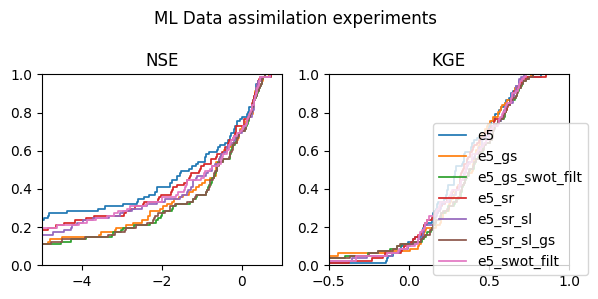

In [3]:
plt.close('all')

num_models = len(exps)

metric_names = {'NSE': 'NSE',
                'KGE': 'KGE'}

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()

for ax, (name, title) in zip(axes, metric_names.items()):
    for exp_name, results, bulk_metrics, basin_metrics in exps:
        x = np.array(basin_metrics['discharge'][name], dtype=float)
        x = x[~np.isnan(x)]
        ax.ecdf(x, linewidth=1.25, label=exp_name)
    
    ax.set_title(title)

axes[0].set_xlim([-5, 1])
axes[1].set_xlim([-0.5, 1])

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.0, 0.35))

# fig.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.95, wspace=0.3, hspace=0.4)
plt.suptitle('ML Data assimilation experiments')
plt.tight_layout()
plt.show()

# fig.savefig(fig_dir / f"ABC_cdfs.png", dpi=300)

In [6]:
x

Type,obs,pred
date,,
2024-01-01,90.330757,47.732136
2024-01-02,75.889160,43.548290
2024-01-03,64.279243,40.138145
2024-01-04,56.350536,37.996334
2024-01-05,48.988144,36.041531
...,...,...
2024-12-27,37.378239,32.020271
2024-12-28,38.227741,33.137577
2024-12-29,56.633682,36.427860


In [38]:
results['obs']['discharge'].groupby('basin').mean().dropna().sort_values()

basin
7090627140       1.524527
7090544220       1.646467
7090603460       2.124509
7090635740       2.183096
7090537170       2.224512
                 ...     
7090573680     319.310150
7090591570     368.134155
7090583760     729.931763
7090587840    3293.930176
7090589620    3464.069824
Name: discharge, Length: 81, dtype: float32

In [102]:
basin_metrics['discharge']['NSE'].dropna().sort_values()

7090595280   -22.208656
7090647530   -14.781707
7090634950   -14.680088
7090626920    -8.707555
7090642550    -7.571507
                ...    
7090554280     0.478075
7090567440     0.498883
7090542860     0.503619
7090510030     0.530114
7090524760     0.568576
Name: NSE, Length: 81, dtype: object

0.7107115988104183

e5: 0.15018826723098755
e5_sr_sl: 0.3339124917984009
e5_sr_sl_gs: 0.5301142036914825


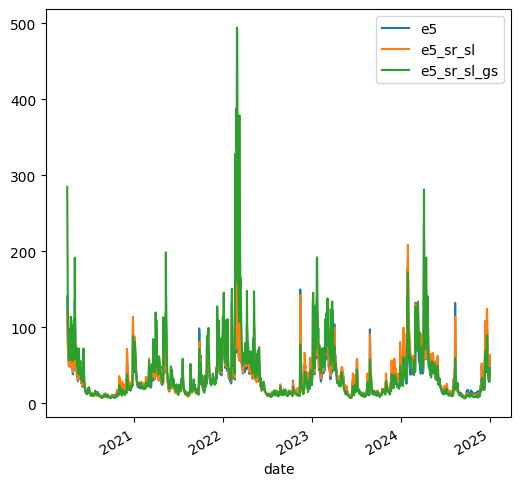

In [114]:
reach_id = '7090510030'
start_date = "2020-01-01"
end_date = "2025-01-01"
metric = 'NSE'

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for exp_name, results, bulk_metrics, basin_metrics in exps: 
    x = results.xs(reach_id, level='basin').sort_index()
    x = x.loc[start_date:end_date]
    x['pred']['discharge'].plot(ax=ax, label=exp_name)
    print(f"{exp_name}: {basin_metrics.loc[reach_id]['discharge'][metric]}")
    

# x['obs']['discharge'].plot(color='black', ax=ax, label='gauge')
plt.legend()

In [5]:
axes[1].legend(loc='lower center', bbox_to_anchor=(0.5, 0.025))
plt.show()

In [ ]:
avg_dt = results[0]['dt']['landsat'].groupby(level='basin').mean().values
RE_change = (basin_metrics[0]['flux']['RE']- basin_metrics[2]['flux']['RE']).values.astype(float)

In [ ]:
results[0]

In [ ]:
plt.close('all')
plt.scatter(avg_dt,np.sign(RE_change))

In [ ]:
basin_metrics[0]['flux']['RE'].values.astype(float)

In [64]:
exps[0][1]

,Type,obs,pred
,Feature,discharge,discharge
basin,date,,
7090612640,2024-12-17,NaN,3608.210693
7090612370,2024-12-17,NaN,3663.682861
7090612290,2024-12-17,NaN,7.446938
7090610840,2024-12-17,NaN,9.998402
7090610750,2024-12-17,NaN,3673.447754
...,...,...,...
7090488880,2024-03-28,NaN,22.745106
7090490100,2024-03-28,NaN,11.299378


In [5]:
name

'e5_sr_sl'

In [15]:
basin_metrics

Feature    discharge                                                        \
Metric       num_obs   R2 MAPE nBias   RE   RB  qRE qnBias  MAE RMSE rRMSE   
7090482240       NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN   NaN   
7090482250       NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN   NaN   
7090485690       NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN   NaN   
7090485920       NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN   NaN   
7090486360       NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN   NaN   
...              ...  ...  ...   ...  ...  ...  ...    ...  ...  ...   ...   
7091090690       NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN   NaN   
7091091730       NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN   NaN   
7091092150       NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN   NaN   
7091092540       NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN   NaN   
7091093090       NaN  NaN  NaN   NaN  NaN  NaN  NaN    NaN  NaN  NaN   NaN   

Feature                         
Metric      KGE  NSE Agreement  
7090482240  NaN  NaN       NaN  
7090482250  NaN  NaN       NaN  
7090485690  NaN  NaN       NaN  
7090485920  NaN  NaN       NaN  
7090486360  NaN  NaN       NaN  
...         ...  ...       ...  
7091090690  NaN  NaN       NaN  
7091091730  NaN  NaN       NaN  
7091092150  NaN  NaN       NaN  
7091092540  NaN  NaN       NaN  
7091093090  NaN  NaN       NaN  

[1962 rows x 14 columns]

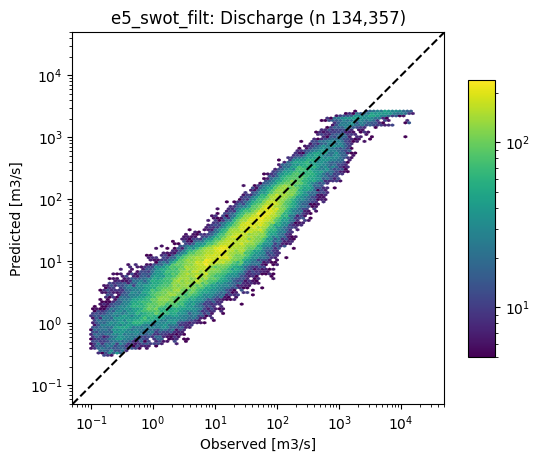

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

exp_idx = 6
name = exps[exp_idx][0]

x = exps[exp_idx][1]['obs']['discharge']
y = exps[exp_idx][1]['pred']['discharge']
positive_mask = (x > 0) & (y > 0)
x = x[positive_mask]
y = y[positive_mask]

min_val = 5E-2
max_val = 5E4
log_min = np.log10(min_val)
log_max = np.log10(max_val)

hb = ax.hexbin(x, y, gridsize=(100,80), bins='log', mincnt=5,
            linewidth=0.1,
            extent=(log_min, log_max, log_min, log_max),
            xscale='log', yscale='log')
plt.colorbar(hb, shrink=0.6, aspect=10, anchor=(0,0.5))

# Add a 1:1 line over the min and max of x and y
ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1.5)

# Setting axes to be square and equal range
ax.axis('square')
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
ax.set_title(f"{name}: Discharge (n {len(x):,})")
ax.set_xlabel(f'Observed [m3/s]')
ax.set_ylabel(f'Predicted [m3/s]')
plt.show()

fig.savefig(fig_dir / f"{name}_bulk_scatterplots.png", dpi=300)